In [4]:
!python -m pip install pandas matplotlib seaborn 


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import warnings

In [6]:
df = pd.read_excel('arrecadacao_estados.xlsx', sheet_name='arrecadacao', skiprows=(0,0))

In [7]:
# Carregando o DataFrame
df = pd.read_excel('arrecadacao_estados.xlsx', sheet_name='arrecadacao', skiprows=(0,0))

# 1. LIMPEZA DOS NOMES DAS COLUNAS
# O método .str.strip() remove espaços em branco (ou quebras de linha) no início e no final de cada nome de coluna.
df.columns = df.columns.str.strip()

# 2. Renomeando a coluna (nome original limpo)
# O pandas usa o nome exato.
# OBS: Mantendo a renomeação, pois 'RECEITA_TOTAL' é mais fácil de usar.
df.rename(columns={'TOTAL GERAL DA RECEITA TRIBUTÁRIA': 'RECEITA_TOTAL'}, inplace=True)

# 3. Removendo as linhas onde o valor da RECEITA_TOTAL (agora renomeada) é nulo
# Este passo agora deve encontrar a coluna 'RECEITA_TOTAL'
df_limpo = df.dropna(subset=['RECEITA_TOTAL']).copy()

# 4. Estabelecendo o ano mínimo para 1997
ANO_MINIMO_VALIDO = 1997

print("\nLinhas após o dropna:")
print(f"Total de linhas original: {len(df)}")
print(f"Total de linhas após limpeza: {len(df_limpo)}")

print("\nAs 5 primeiras linhas do DataFrame limpo:")
print(df_limpo.head())


Linhas após o dropna:
Total de linhas original: 8181
Total de linhas após limpeza: 8149

As 5 primeiras linhas do DataFrame limpo:
   id_uf    ESTADO  co_periodo   ANO  MÊS  1.1 - PRIMÁRIO  1.2 - SECUNDÁRIO  \
0      1  Rondônia      199701  1997    1             0.0         2120658.0   
1      2      Acre      199701  1997    1        131244.0           27081.0   
2      3  Amazonas      199701  1997    1        303315.0        50114692.0   
3      4   Roraima      199701  1997    1             0.0               0.0   
4      5      Pará      199701  1997    1       3086657.0        11398886.0   

   1.3 - TERCIÁRIO  1.3.1 - COMÉRCIO ATACADISTA  1.3.2 - COMÉRCIO VAREJISTA  \
0       13802145.0                       7996.0                   6463126.0   
1        3950833.0                          0.0                         0.0   
2       52859305.0                          0.0                         0.0   
3              0.0                          0.0                         0.0  

In [8]:
# Passo 3: Criando uma Chave de Tempo Única (continuando a partir do df_limpo)
# O código de limpeza anterior garantiu que as colunas 'ANO' e 'MÊS' estão acessíveis.

# Criando uma coluna 'DATA' no formato ano-mês para facilitar ordenação e gráficos
# 1. Formatando o MÊS para ter 2 dígitos (ex: 1 -> 01)
df_limpo['MÊS_STR'] = df_limpo['MÊS'].astype(str).str.zfill(2)

# 2. Combinando ANO e MÊS para criar a data
df_limpo['DATA'] = pd.to_datetime(
    df_limpo['ANO'].astype(str) + '-' + df_limpo['MÊS_STR'],
    format='%Y-%m'
)

# 3. Removendo colunas auxiliares
df_limpo.drop(columns=['MÊS_STR', 'co_periodo'], inplace=True)

print("\nDataFrame com coluna DATA:")
print(df_limpo[['ANO', 'MÊS', 'DATA', 'RECEITA_TOTAL']].head())


DataFrame com coluna DATA:
    ANO  MÊS       DATA  RECEITA_TOTAL
0  1997    1 1997-01-01     22704634.0
1  1997    1 1997-01-01      4335907.0
2  1997    1 1997-01-01    112445077.0
3  1997    1 1997-01-01     14790265.0
4  1997    1 1997-01-01     70547612.0


In [9]:
# Garantindo que o DataFrame esteja ordenado pelo tempo
df_limpo = df_limpo.sort_values(by='DATA')

# Agrupamento: somar a RECEITA_TOTAL para cada mês/ano ('DATA')
receita_global = df_limpo.groupby('DATA')['RECEITA_TOTAL'].sum().reset_index()

print("Dados de Receita Global por Data (Amostra):")
print(receita_global.tail())

Dados de Receita Global por Data (Amostra):
          DATA  RECEITA_TOTAL
297 2021-11-01   6.597141e+10
298 2021-12-01   7.113479e+10
299 2022-01-01   7.176265e+10
300 2022-02-01   5.183681e+10
301 2022-03-01   2.743295e+09


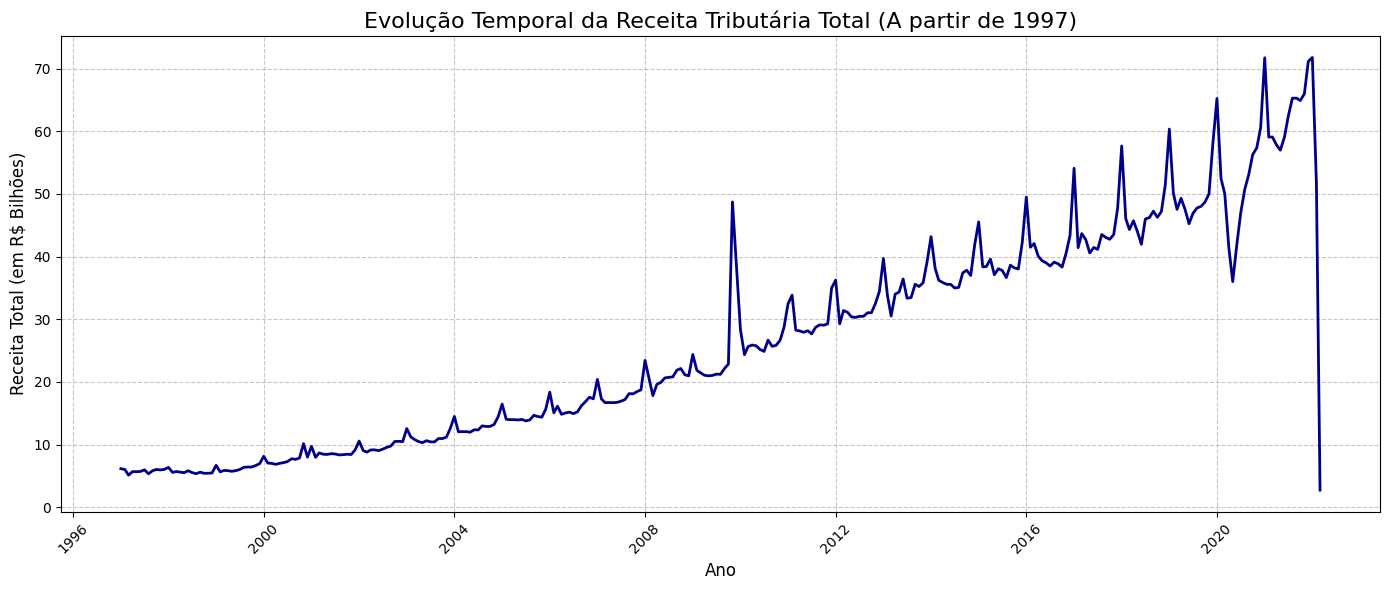

In [11]:
# Usando a filtragem definida anteriormente para consistência
df_filtrado = df_limpo[df_limpo['ANO'] >= ANO_MINIMO_VALIDO].copy()

# Agrupamento: somar a RECEITA_TOTAL para cada mês/ano ('DATA')
receita_global_filtrada = df_filtrado.groupby('DATA')['RECEITA_TOTAL'].sum().reset_index()

# Normalização dos dados para Bilhões (para o gráfico)
# A receita está em Reais. Dividindo por 1 bilhão (1e9)
receita_global_em_bilhoes = receita_global_filtrada.copy()
receita_global_em_bilhoes['RECEITA_TOTAL'] = receita_global_filtrada['RECEITA_TOTAL'] / 1e9

# Gerando Gráfico de Linha (Ajustado)
plt.figure(figsize=(14, 6))

# Criando o gráfico com os dados em Bilhões
plt.plot(
    receita_global_em_bilhoes['DATA'],
    receita_global_em_bilhoes['RECEITA_TOTAL'],
    color='darkblue',
    linewidth=2
)

# Adicionando Título e Rótulos
plt.title('Evolução Temporal da Receita Tributária Total (A partir de 1997)', fontsize=16)
# Ajustando o Label do Eixo Y para Bilhões
plt.ylabel('Receita Total (em R$ Bilhões)', fontsize=12)
plt.xlabel('Ano', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# A linha abaixo impede que o Matplotlib use notação científica no eixo Y.
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


### O gráfico acima, mostra a Evolução Temporal da Receita Tributária Total do Brasil desde 1997, carregando informações cruciais sobre a saúde fiscal e a história econômica do país.


#### Interpretação do Gráfico de Evolução Temporal

##### **1. Tendência de Crescimento Constante (A Longo Prazo)**

A observação mais importante é a tendência ascendente clara da linha ao longo das últimas duas décadas e meia.

* **O que significa**: A capacidade do sistema tributário brasileiro de arrecadar tributos (ICMS, IPVA, ITCD, etc.) **aumentou drasticamente** desde 1997, passando de um patamar de **R$ 5-10 Bilhões** para **R$ 60-70 Bilhões** no final da série. Isso reflete o crescimento do PIB, o aumento do consumo, a formalização da economia e o impacto da inflação.
---

##### **2. Sazonalidade Anual (Picos e Vales Recorrentes)**

Note as "**ondas**" ou picos que se repetem a cada ano.

- **O que significa**: A arrecadação não é linear ao longo do ano. É muito comum que os **últimos meses do ano (novembro/dezembro)** e o **início do ano (janeiro)** registrem picos de arrecadação.

    - **Picos**: Geralmente devido ao 13º salário, maior consumo de final de ano (ICMS) e o pagamento de impostos de início de ano (como IPVA).

    - **Vales (Quedas)**: O meio do ano (ex: maio, junho) costuma ter uma arrecadação ligeiramente menor.
---

##### **3. Crises e Pontos de Inflexão (Eventos Econômicos)**
O gráfico revela o impacto de grandes eventos na economia:

* **Queda de 2009**: Há uma queda notável e momentânea na linha por volta de 2009. Isso coincide com a **Crise Financeira Global** (Subprime), que afetou o comércio e a produção mundial, resultando em menor arrecadação.

* **Aumento Pós-2020**: O crescimento explosivo visto a partir de 2021 e 2022 reflete uma **forte recuperação econômica** (após o impacto inicial da pandemia, que não é totalmente visível aqui, mas está implícito no salto) e, crucialmente, os efeitos inflacionários no valor dos bens, que aumentam a base de cálculo do ICMS.
---

##### 4. **O "Mergulho" no Final da Série**
Observe o ponto final mais baixo da linha, no extremo direito.

**O que significa**: Como discutimos, a última data registrada provavelmente representa **dados incompletos** para o mês corrente, que ainda não foi totalmente contabilizado, ou um mês atipicamente fraco. Essa queda não é um sinal de colapso, mas um **artefato da coleta de dados**.



In [12]:
# 1. Agrupar por ESTADO e somar a RECEITA_TOTAL
ranking_estados = df_filtrado.groupby('ESTADO')['RECEITA_TOTAL'].sum().reset_index()
ranking_estados.columns = ['ESTADO', 'RECEITA_TOTAL']

# 2. Normalizar: Converter para R$ Bilhões (dividindo por 1 bilhão)
ranking_estados['RECEITA_TOTAL_BILHOES'] = ranking_estados['RECEITA_TOTAL'] / 1e9

# 3. Ordenar: Ranqueamento decrescente (do maior para o menor)
ranking_estados = ranking_estados.sort_values(by='RECEITA_TOTAL_BILHOES', ascending=False)

print("Top 5 Estados em Arrecadação Total (em R$ Bilhões):")
print(ranking_estados[['ESTADO', 'RECEITA_TOTAL_BILHOES']].head())

Top 5 Estados em Arrecadação Total (em R$ Bilhões):
               ESTADO  RECEITA_TOTAL_BILHOES
25          São Paulo            2550.061540
12      Minas Gerais              792.023589
20     Rio de janeiro             672.242330
19  Rio Grande do Sul             524.363418
13             Paraná             472.630845


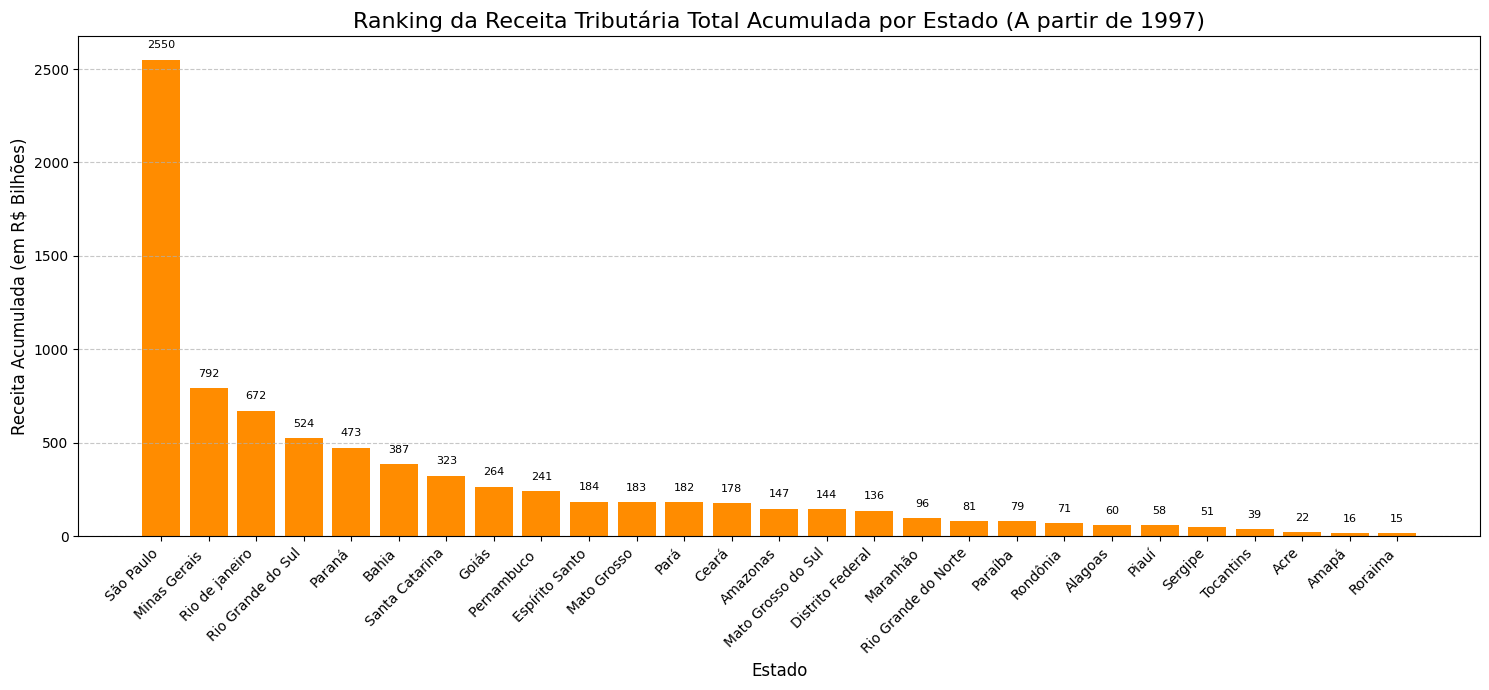

In [13]:
# Configurando o tamanho do gráfico
plt.figure(figsize=(15, 7))

# Criando o gráfico de barras
bars = plt.bar(
    ranking_estados['ESTADO'],
    ranking_estados['RECEITA_TOTAL_BILHOES'],
    color='darkorange'
)

# Adicionando Título e Rótulos
plt.title(f'Ranking da Receita Tributária Total Acumulada por Estado (A partir de {ANO_MINIMO_VALIDO})', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Receita Acumulada (em R$ Bilhões)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Gira o nome dos estados para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando o valor exato no topo de cada barra (opcional, mas útil)
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 50, # Posição um pouco acima da barra
        f'{yval:.0f}', # Formato sem casas decimais
        ha='center',
        va='bottom',
        fontsize=8
    )

# Ajusta o layout para evitar cortes
plt.tight_layout()
plt.show()

### O gráfico de barras acima é extremamente informativo e mostra a **concentração de poder fiscal** no Brasil, acumulada desde 1997.

---

#### Interpretação do Ranking de Arrecadação por Estado

##### **1. Concentração Extrema de Receita**

O aspecto mais evidente do gráfico é a enorme disparidade entre os estados.
 
A arrecadação está **altamente concentrada**.

* **São Paulo (SP) Dominante**: São Paulo, com mais de **R$ 2.550 Bilhões** arrecadados, está em um patamar totalmente diferente de qualquer outro estado. Sua arrecadação é:
    * Mais de **3 vezes maior** que a do segundo colocado, Minas Gerais (R$ 792 Bi).
    * Quase **4 vezes maior** que a do terceiro colocado, Rio de Janeiro (R$ 672 Bi).

* **O que isso significa**: São Paulo é, de longe, o motor econômico e fiscal do Brasil. Essa concentração reflete seu vasto parque industrial, grande população consumidora e o volume de serviços e comércio (setor terciário) que gera o maior volume de ICMS do país.

---

##### **2. O "G4" da Arrecadação**

Existe um grupo de quatro estados que, juntos, dominam a maior parte da arrecadação nacional.

1.  **São Paulo (SP)**: R$ 2.550 Bi
2.  **Minas Gerais (MG)**: R$ 792 Bi
3.  **Rio de Janeiro (RJ)**: R$ 672 Bi
4.  **Rio Grande do Sul (RS)**: R$ 524 Bi

* **O que isso significa**: Estes quatro estados, que representam as maiores economias regionais do Sudeste e Sul, são responsáveis pela **maior parte da receita tributária** que financia os orçamentos estaduais.

---

##### **3. A Longa Cauda dos Demais Estados**

Após o "G4", há um degrau significativo para o quinto estado (Paraná, R$ 473 Bi) e uma **longa "cauda" de estados** com arrecadação muito menor.

* **Exemplos Notáveis**: Estados do Norte e Nordeste, embora vastos territorialmente, apresentam as menores receitas acumuladas. Por exemplo, **Roraima** (R$ 15 Bi), **Amapá** (R$ 16 Bi) e **Acre** (R$ 22 Bi) somam, juntos, um valor minúsculo comparado a São Paulo.

* **Implicações**: A baixa arrecadação própria nesses estados significa uma **maior dependência de transferências federais** (como o Fundo de Participação dos Estados - FPE) para manter seus orçamentos.

In [14]:
df_filtrado = df_limpo[df_limpo['ANO'] >= ANO_MINIMO_VALIDO].copy()

# 1. Definir as colunas de setores de interesse
colunas_setores = [
    '1.1 - PRIMÁRIO',
    '1.2 - SECUNDÁRIO',
    '1.3 - TERCIÁRIO',
    '2.1 - ENERGIA ELÉTRICA',
    '2.2 - PETRÓLEO, COMBUSTÍVEIS E LUBRIFICANTES'
]

# 2. Agrupar os dados por ESTADO e somar apenas as colunas de setores
df_setorial = df_filtrado.groupby('ESTADO')[colunas_setores].sum()

# 3. Converter para R$ Bilhões (dividindo por 1 bilhão)
df_setorial_bilhoes = df_setorial / 1e9

# 4. Ordenar o DataFrame pela arrecadação TOTAL do ICMS (a soma das colunas)
# Isso garante que a ordem no gráfico seja a mesma do Ranking
df_setorial_bilhoes['TOTAL_ICMS'] = df_setorial_bilhoes.sum(axis=1)
df_setorial_bilhoes = df_setorial_bilhoes.sort_values(by='TOTAL_ICMS', ascending=False)

print("Composição Setorial do ICMS (em R$ Bilhões - Top 5 Estados):")
print(df_setorial_bilhoes.head())

Composição Setorial do ICMS (em R$ Bilhões - Top 5 Estados):
                   1.1 - PRIMÁRIO  1.2 - SECUNDÁRIO  1.3 - TERCIÁRIO  \
ESTADO                                                                 
São Paulo                4.746360        781.520809       846.957567   
Minas Gerais             4.059256        201.108075       227.254521   
Rio de janeiro          16.118854        112.194054       252.950705   
Rio Grande do Sul        2.554856        152.863140       161.021744   
Paraná                   8.881975         67.893097       130.146305   

                   2.1 - ENERGIA ELÉTRICA  \
ESTADO                                      
São Paulo                      165.537933   
Minas Gerais                    81.576049   
Rio de janeiro                  80.396513   
Rio Grande do Sul               48.464724   
Paraná                          55.925077   

                   2.2 - PETRÓLEO, COMBUSTÍVEIS E LUBRIFICANTES   TOTAL_ICMS  
ESTADO                                 

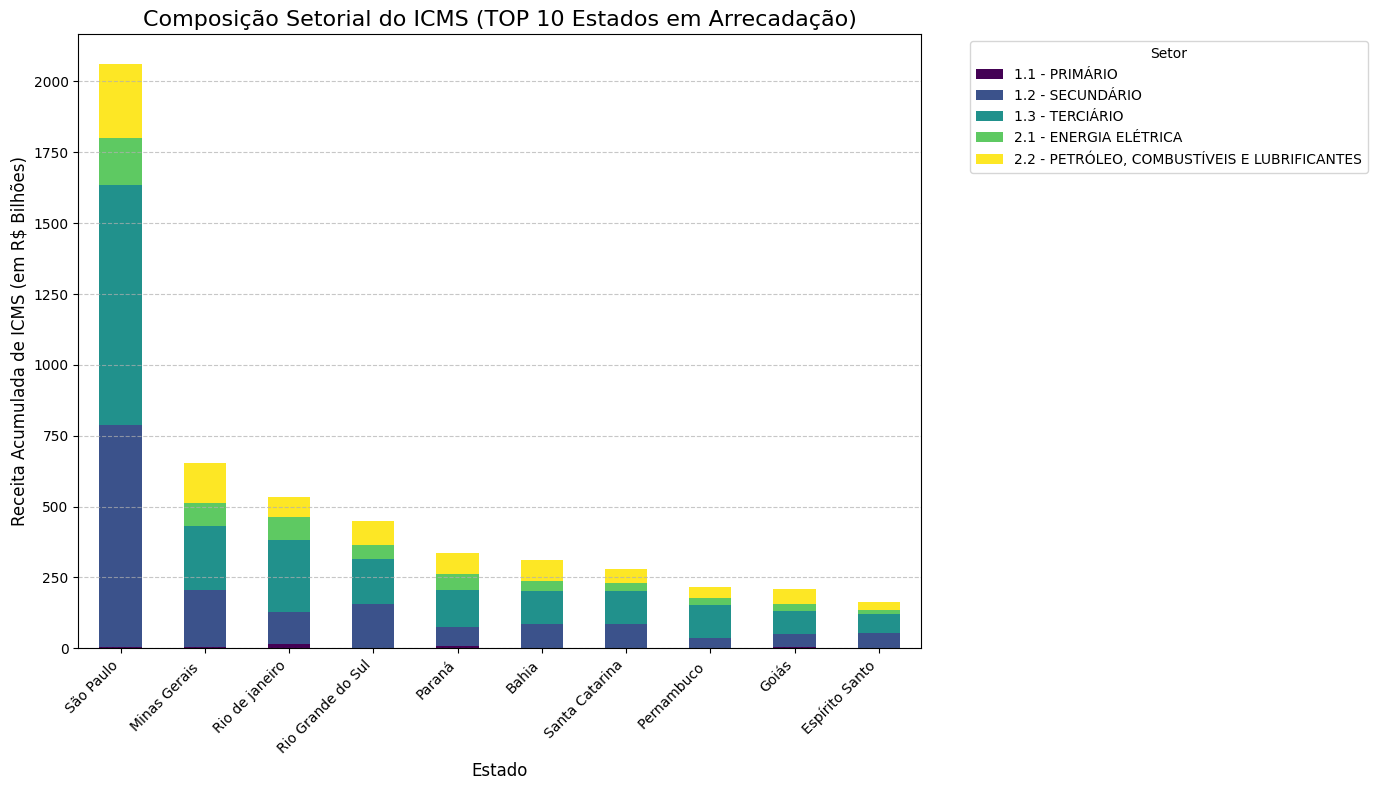

In [15]:
df_filtrado = df_limpo[df_limpo['ANO'] >= ANO_MINIMO_VALIDO].copy()

# 1. Definir as colunas de setores de interesse
colunas_setores = [
    '1.1 - PRIMÁRIO',
    '1.2 - SECUNDÁRIO',
    '1.3 - TERCIÁRIO',
    '2.1 - ENERGIA ELÉTRICA',
    '2.2 - PETRÓLEO, COMBUSTÍVEIS E LUBRIFICANTES'
]

# 2. Agrupar os dados por ESTADO e somar apenas as colunas de setores
df_setorial = df_filtrado.groupby('ESTADO')[colunas_setores].sum()

# 3. Converter para R$ Bilhões (dividindo por 1 bilhão)
df_setorial_bilhoes = df_setorial / 1e9

# 4. Ordenar o DataFrame pela arrecadação TOTAL do ICMS
df_setorial_bilhoes['TOTAL_ICMS'] = df_setorial_bilhoes.sum(axis=1)
df_setorial_bilhoes = df_setorial_bilhoes.sort_values(by='TOTAL_ICMS', ascending=False)

# ----------------------------------------------------------------------
# NOVO PASSO: Filtrar para as 10 primeiras linhas (TOP 10)
df_setorial_top10 = df_setorial_bilhoes.head(10).copy()
# ----------------------------------------------------------------------

# 5. Remover a coluna auxiliar 'TOTAL_ICMS' antes de plotar
df_plot = df_setorial_top10.drop(columns=['TOTAL_ICMS'])

# Gerando o gráfico de barras empilhadas (continua no passo 2)
df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8), # Diminuí o figsize para um gráfico menor
    colormap='viridis'
)

# Adicionando Título e Rótulos
plt.title(f'Composição Setorial do ICMS (TOP 10 Estados em Arrecadação)', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Receita Acumulada de ICMS (em R$ Bilhões)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Setor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### O gráfico de barras empilhadas acima nos permite mergulhar na estrutura econômica de cada um dos **10 maiores estados arrecadadores**.

#### Enquanto o ranking anterior mostrava o tamanho da arrecadação, este mostra o **DNA fiscal de cada estado**.

* **A seguir uma explicação da sigla "ICMS" e do termo "DNA Fiscal"**

> **ICMS é a sigla para Imposto sobre Operações relativas à Circulação de Mercadorias e sobre Prestações de Serviços de Transporte Interestadual e Intermunicipal e de Comunicação.**

> **O termo "DNA Fiscal" é uma metáfora que usei para descrever a estrutura de arrecadação de um estado. Assim como o DNA biológico define as características de um organismo, o DNA Fiscal define a base econômica e a dependência tributária de um estado. Em resumo, o "DNA Fiscal" é o padrão de cores que observamos no gráfico de barras empilhadas.**

---
##### **1. Dominância do Setor Terciário (Comércio e Serviços)**
O aspecto mais chamativo é a cor **verde-água (Setor Terciário)** e a cor **azul-escuro (Setor Secundário)**.

* **Terciário (ICMS 1.3 - Comércio e Serviços):** Esta é a **maior fatia da arrecadação** de quase todos os estados. Ele engloba o comércio (varejo e atacado), que é a principal fonte de ICMS no Brasil.
    * Em **São Paulo**, o Terciário (e o Secundário) compõem o grosso dos impressionantes R$ 2.000+ Bilhões.

---
##### **2. A Importância Crítica dos Combustíveis e Energia**
O segundo elemento mais importante é a fatia no topo de cada barra:

* **Petróleo, Combustíveis e Lubrificantes (ICMS 2.2 - Amarelo):** Esta categoria é a **segunda ou terceira maior fonte de ICMS** na maioria dos estados. É um imposto essencial e volumoso.
* **Energia Elétrica (ICMS 2.1 - Verde Claro):** Similarmente, a receita gerada pelo consumo de energia elétrica é uma **base fiscal robusta e significativa** em praticamente todos os estados.

**O que isso significa:** A economia brasileira é extremamente dependente dos **serviços/comércio (Terciário)** e da tributação de **itens essenciais** de alto valor agregado e consumo constante (**Combustíveis e Energia**).

---
##### **3. Diferenciais Regionais (Os "DNA's" Fiscais)**
O gráfico revela sutilmente as economias de alguns estados:

> **Por que isso importa?**

> **Se um estado tem um DNA Fiscal muito dependente de um único setor (ex: Petróleo), ele se torna vulnerável a choques de preço globais. Se ele tem um DNA Fiscal diversificado (ex: Minas Gerais), é mais resiliente a crises setoriais.**

* **Rio de Janeiro e Espírito Santo:** É provável que a importância do setor de **Petróleo e Combustíveis (Amarelo)** seja desproporcionalmente alta nesses estados, dada a exploração de petróleo na região.
* **Minas Gerais:** Apresenta uma composição bastante **equilibrada**, indicando uma economia diversificada entre indústria (Secundário), serviços (Terciário) e a tributação de *commodities* essenciais.
* **Paraná, Santa Catarina e Rio Grande do Sul:** Seguem um padrão semelhante ao do Sudeste, mas com uma fatia relevante do **Secundário (Indústria - Azul Escuro)**, refletindo a força da industrialização no Sul.

---
##### **4. A Irrelevância Fiscal do Setor Primário**
* **Primário (ICMS 1.1 - Roxo):** A fatia roxa na base da barra é **minúscula ou inexistente** em praticamente todos os estados (com exceção de alguns onde a agropecuária é forte, mas ainda assim, é uma fatia marginal).

**O que isso significa:** Embora a agricultura e a pecuária sejam cruciais para o PIB brasileiro, o sistema tributário estadual (ICMS) **não depende significativamente** da arrecadação direta sobre a produção primária, que muitas vezes é desonerada ou possui alíquotas reduzidas.

In [16]:
df_filtrado = df_limpo[df_limpo['ANO'] >= ANO_MINIMO_VALIDO].copy()

# 1. Definir as colunas de Outros Tributos de interesse
colunas_outros_tributos = [
    'IPVA',
    'ITCD',
    'TAXAS',
    'TOTAL ARRECADAÇÃO DE OUTROS TRIBUTOS' # Usamos essa coluna para ranquear
]

# 2. Agrupar os dados por ESTADO e somar apenas as colunas de tributos
df_outros_tributos = df_filtrado.groupby('ESTADO')[colunas_outros_tributos].sum()

# 3. Converter para R$ Bilhões (dividindo por 1 bilhão)
df_outros_tributos_bilhoes = df_outros_tributos / 1e9

# 4. Ordenar: Ranqueamento decrescente pelo TOTAL ARRECADAÇÃO DE OUTROS TRIBUTOS
df_outros_tributos_bilhoes = df_outros_tributos_bilhoes.sort_values(
    by='TOTAL ARRECADAÇÃO DE OUTROS TRIBUTOS',
    ascending=False
)

# 5. Filtrar para as 10 primeiras linhas (TOP 10)
df_outros_tributos_top10 = df_outros_tributos_bilhoes.head(10).copy()

print("Composição de Outros Tributos (em R$ Bilhões - Top 10 Estados):")
print(df_outros_tributos_top10[['IPVA', 'ITCD', 'TAXAS']].head())

Composição de Outros Tributos (em R$ Bilhões - Top 10 Estados):
                      IPVA       ITCD      TAXAS
ESTADO                                          
São Paulo       237.187595  31.331209  87.973635
Rio de janeiro   40.051961  12.772872   0.570693
Minas Gerais     67.757403  10.237888  31.457950
Paraná           39.961935   5.557882   0.970364
Bahia            16.227637   1.513978   8.789791


<Figure size 1400x800 with 0 Axes>

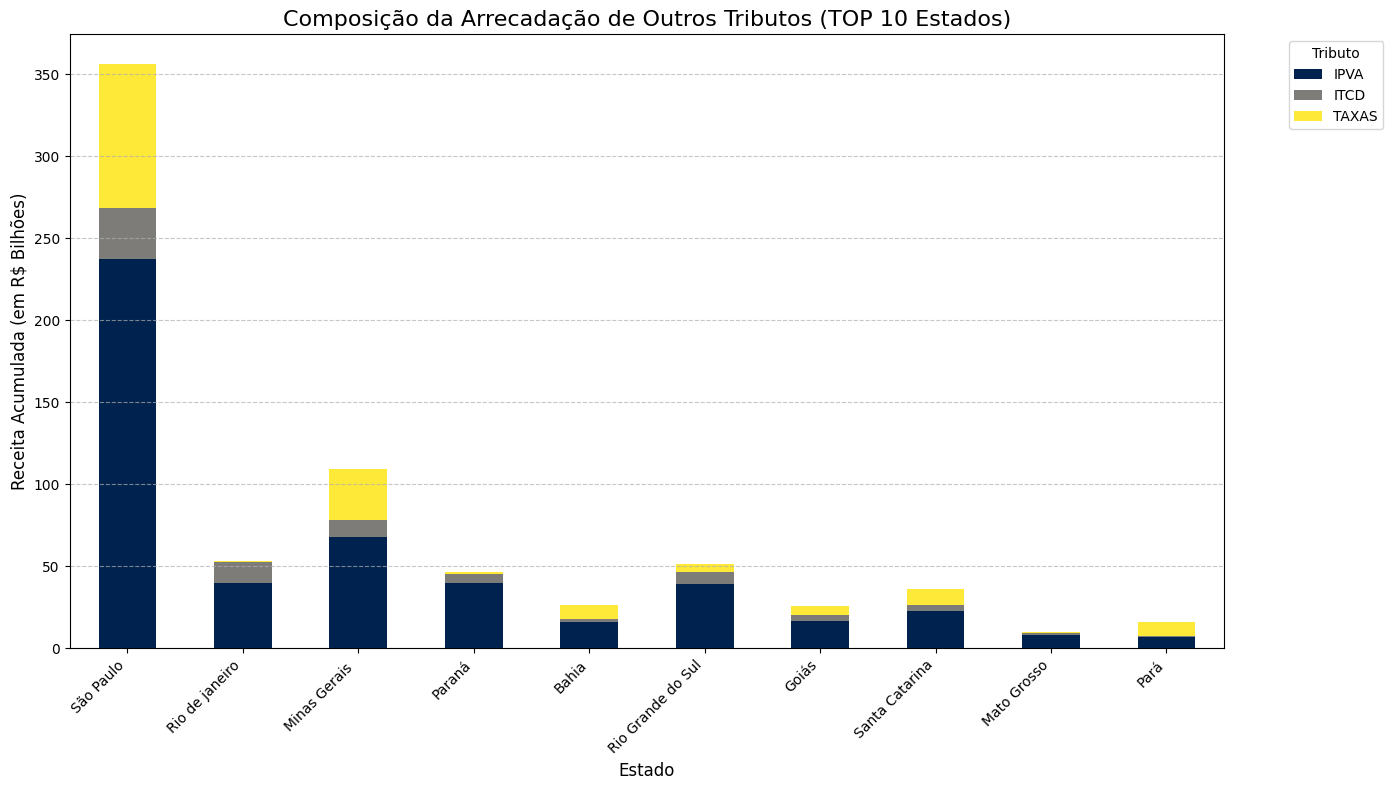

In [17]:
# 6. Preparar para o Plot (remover a coluna total, focando nos componentes)
colunas_para_plotar = ['IPVA', 'ITCD', 'TAXAS']
df_plot_outros = df_outros_tributos_top10[colunas_para_plotar]

# 7. Gerar o Gráfico de Barras Empilhadas
plt.figure(figsize=(14, 8))

# Gerando o gráfico de barras empilhadas
df_plot_outros.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    colormap='cividis' # Novo mapa de cores para diferenciar do gráfico de ICMS
)

# Adicionando Título e Rótulos
plt.title(f'Composição da Arrecadação de Outros Tributos (TOP 10 Estados)', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Receita Acumulada (em R$ Bilhões)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tributo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Interpretação da Composição de Outros Tributos

O gráfico acima **Composição da Arrecadação de Outros Tributos** é crucial para entender a receita que não é de ICMS e como ela se difere entre os estados.

O gráfico mostra o montante total arrecadado por **IPVA, ITCD e TAXAS**, acumulado desde 1997, para os 10 estados com maior arrecadação nesse segmento.

##### **1. Dominância Absoluta do IPVA**

O aspecto mais importante é a cor **Azul Escura (IPVA)**, que representa a maior fatia da receita de Outros Tributos em praticamente todos os estados.

* **IPVA é a Base:** O **Imposto sobre a Propriedade de Veículos Automotores (IPVA)** é a principal fonte de receita dos estados após o ICMS. Como ele é cobrado anualmente sobre a frota de veículos, ele gera um fluxo de caixa maciço e consistente, dominando o total.
* **Significado:** A arrecadação dessa categoria de tributos está diretamente ligada ao **tamanho da frota de veículos** e ao **poder aquisitivo da população** do estado.

---

##### **2. A Concentração em São Paulo**

Assim como no ICMS, a concentração de arrecadação em São Paulo é extrema:

* **São Paulo** (mais de R$ 350 Bilhões) arrecadou **mais que a soma de todos os outros nove estados** do Top 10 em Outros Tributos.
* **O que isso reflete:** O volume gigantesco é impulsionado pelo **tamanho da frota paulista** e pelo **elevado valor venal dos veículos** (carro, moto, caminhão, etc.) circulando no estado.

---
##### **3. A Irrelevância Relativa do ITCD e Taxas**

As faixas **Cinza (ITCD)** e **Amarela (TAXAS)** são muito pequenas na maioria dos estados:

* **ITCD (Imposto sobre Transmissão Causa Mortis e Doação):** É o imposto cobrado sobre heranças e doações. Por não ser cobrado anualmente e depender de eventos específicos (mortes ou grandes doações), sua contribuição para o total acumulado é **marginal** na maioria das barras.
* **TAXAS:** A receita de taxas é esmagada pela escala do IPVA. A **exceção notável é Minas Gerais**, onde a fatia amarela de Taxas é visivelmente maior. Isso sugere que, ou MG possui um volume de cobranças de taxas incomumente alto, ou a sua classificação contábil inclui mais tipos de receita nessa coluna do que em outros estados.